In [1]:
import os
import pyedflib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

In [2]:
os.chdir('/Users/htr365/Documents/Side_Projects/09_founding_lab/amanda_johanna/quantified_self')

In [3]:
train_ids = pd.read_csv('data/train_ids.csv',index_col=0)
test_ids = pd.read_csv('data/test_ids.csv',index_col=0)

In [4]:
df_labels = pd.read_csv("Muscle Data/N1_Study_edited.csv")
df_labels.rename(columns=dict(zip(df_labels.columns, ['id','date',	'pedometer','fatigue',	'symptoms','shower_shower',	'climb_stairs',	'daily_activity',	'pain', 'active_visible_rash',	'feeling',	'feel_tomorrow','pred_yesterday'])), inplace=True)
df_labels['date'] = pd.to_datetime(df_labels['date'])
df_labels.sort_values(by="date", inplace=True)

In [6]:
df_labels['fatigue'].value_counts()

fatigue
2.0    6
1.0    5
3.0    3
4.0    3
5.0    3
Name: count, dtype: int64

In [9]:
# if we are geussing 2 every time
df_labels['fatigue_next_day']= df_labels['fatigue'].shift(periods=-1)
df_test = df_labels.dropna(subset=['fatigue_next_day'])
df_test = df_test[df_test['date'].isin(test_ids['date'])]

In [12]:
# mean absolute error for always guessing 2
np.sum(np.abs(df_test['fatigue_next_day'] -2)/df_test.shape[0])

2.0

Text(0.5, 1.0, 'Histogram of Sample Data')

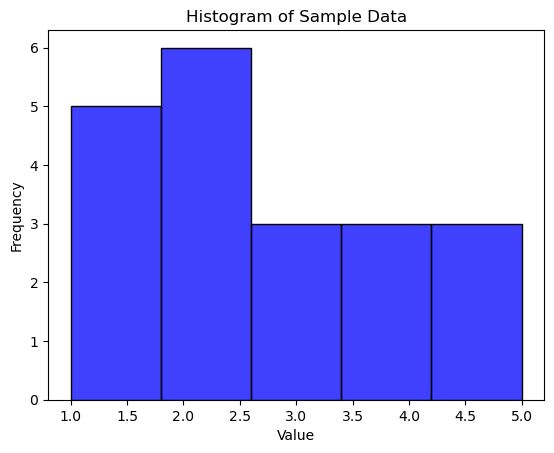

In [7]:
# Create histogram using Seaborn
sns.histplot(df_labels['fatigue'], bins=5, kde=False, color='blue')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Data')